[Reference](https://pub.towardsai.net/time-series-data-visualization-in-python-2b1959726312)

# 1. Line Plots


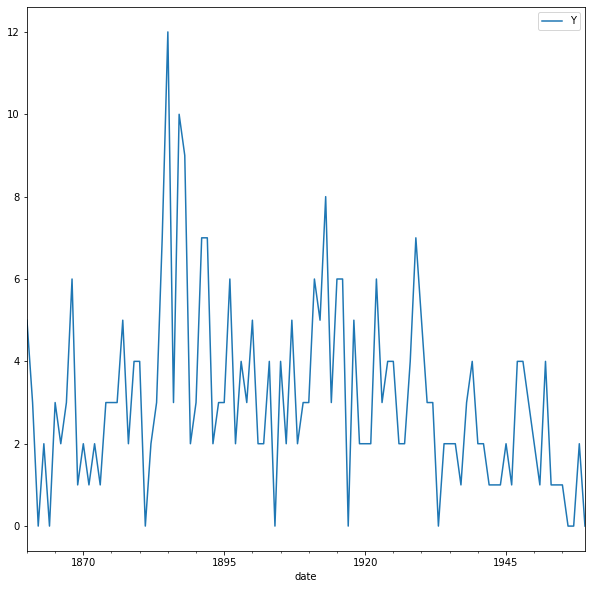

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/discoveries.csv', parse_dates=['date'], index_col='date')
df.plot(figsize=(10,10))
plt.show()

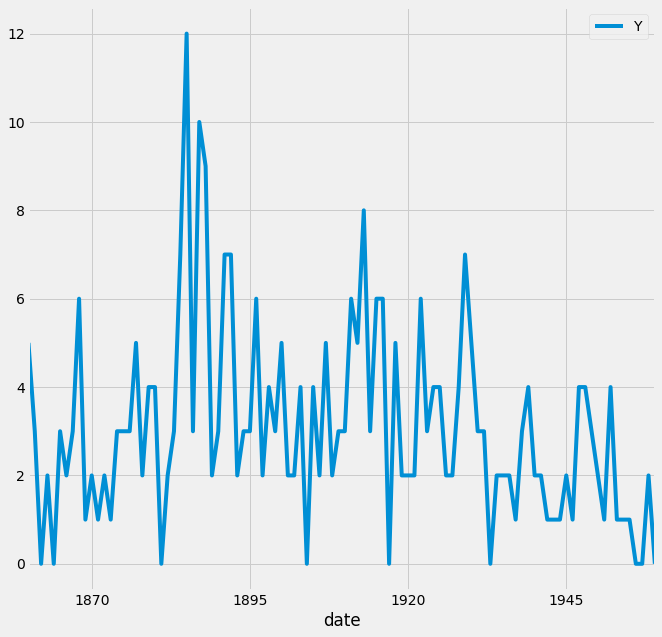

In [3]:
plt.style.use('fivethirtyeight')
df.plot(figsize=(10,10))
plt.show()

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


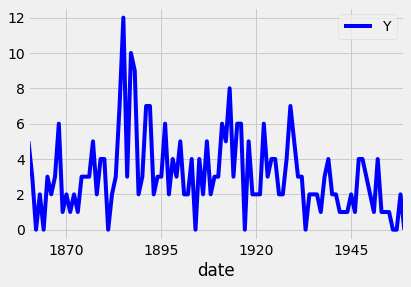

In [7]:
ax = df.plot(color='blue')

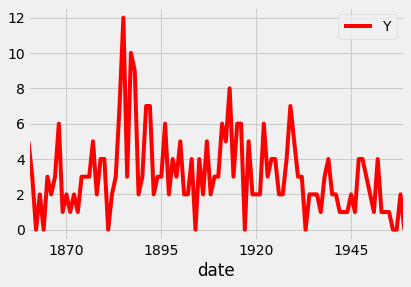

In [6]:
ax = df.plot(color='red')

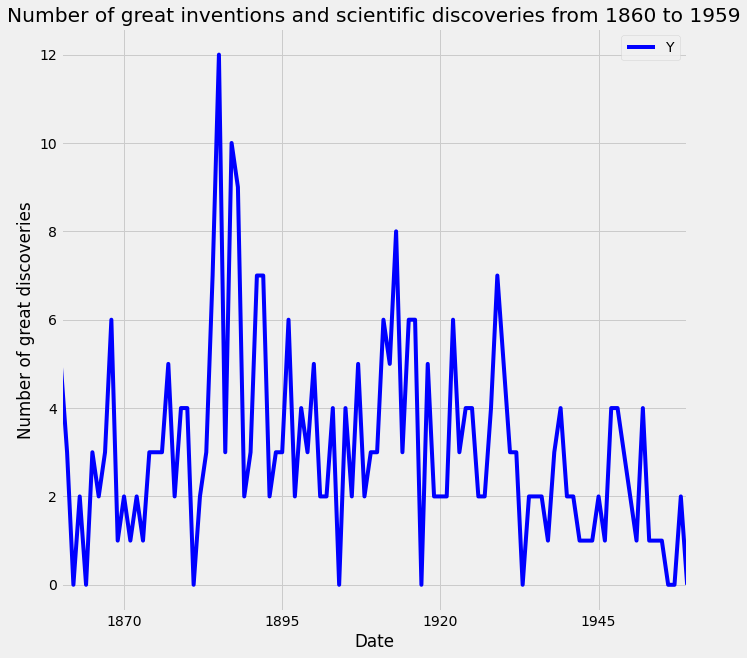

In [8]:
ax = df.plot(color='blue', figsize=(10,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959')
plt.show()

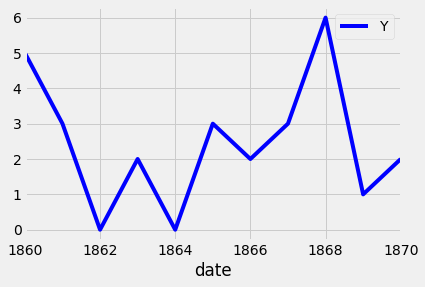

In [9]:
df_subset = df['1860':'1870']
ax = df_subset.plot(color='blue', fontsize=14)
plt.show()

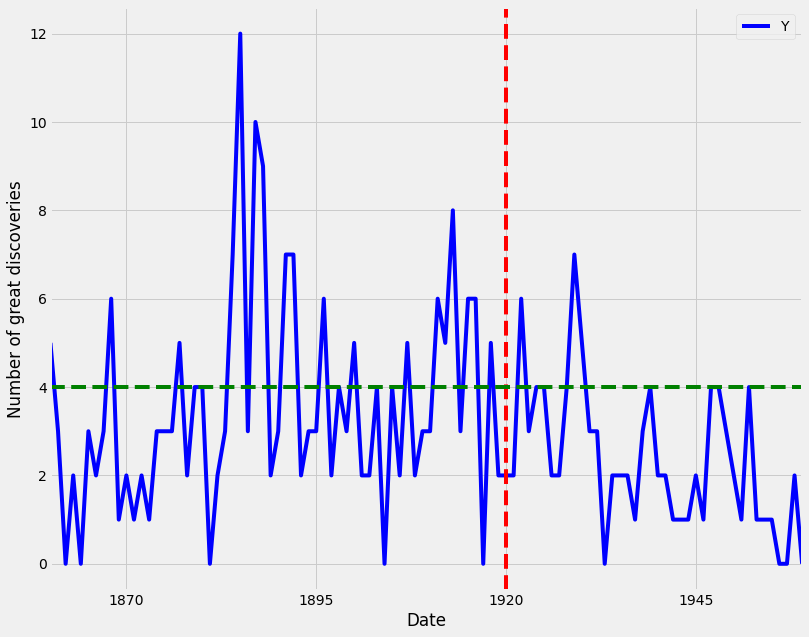

In [10]:
# adding markers
ax = df.plot(color='blue', figsize=(12,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvline('1920-01-01', color='red', linestyle='--')
ax.axhline(4, color='green', linestyle='--')

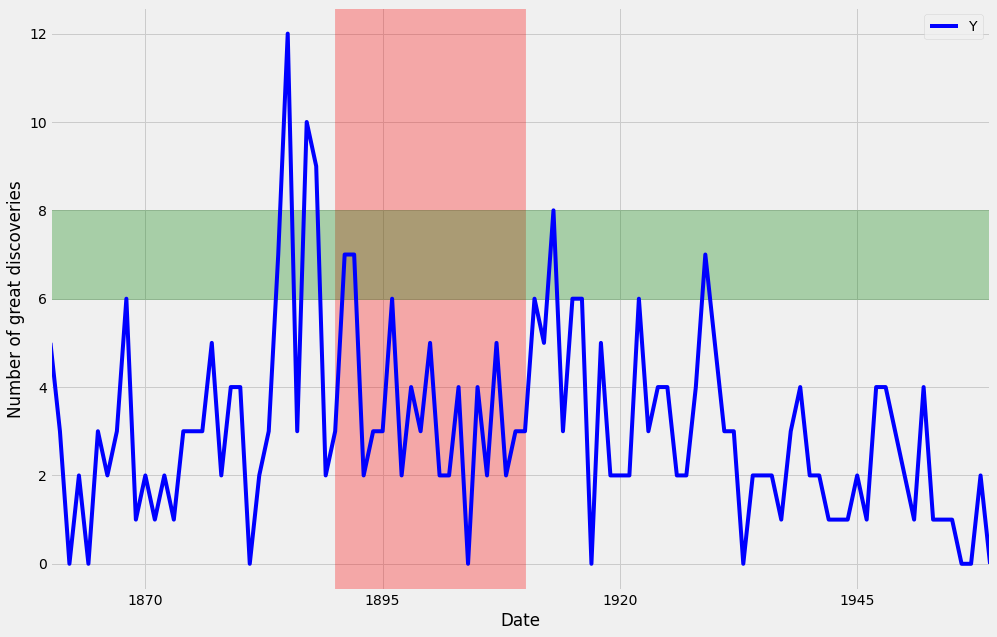

In [11]:
# Highlighting regions of interest
ax = df.plot(color='blue', figsize=(15,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvspan('1890-01-01', '1910-01-01', color='red', alpha=0.3)
ax.axhspan(8, 6, color='green', alpha=0.3)

# 2. Summary Statistics and Diagnostics


In [16]:
co2_levels = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
co2_levels.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [17]:
# count missing values 
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [18]:
# Replacing missing values in a DataFrame
co2_levels = co2_levels.fillna(method='bfill')

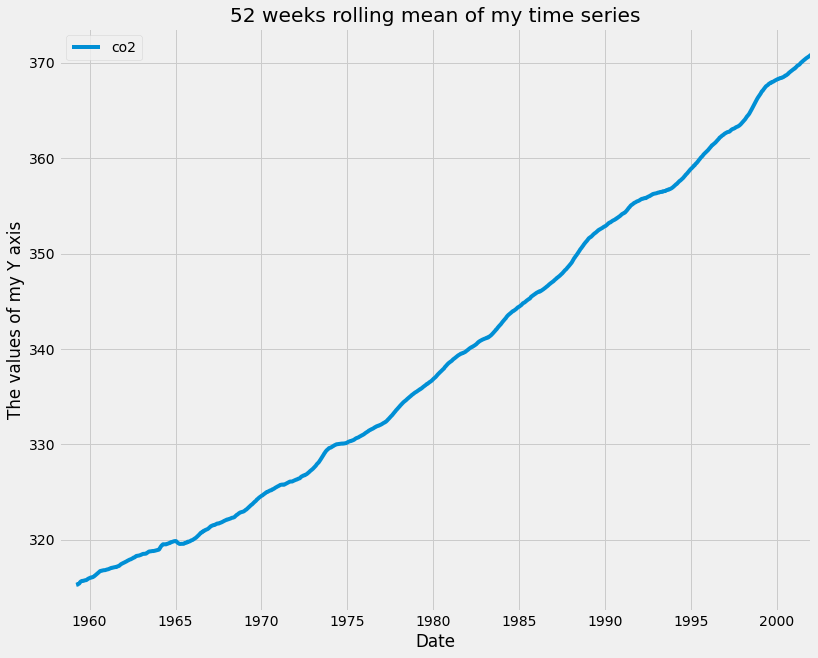

In [19]:
# The moving average model
co2_levels_mean = co2_levels.rolling(window=52).mean()
ax = co2_levels_mean.plot(figsize=(12,10))
ax.set_xlabel("Date")
ax.set_ylabel("The values of my Y axis")
ax.set_title("52 weeks rolling mean of my time series")
plt.show()

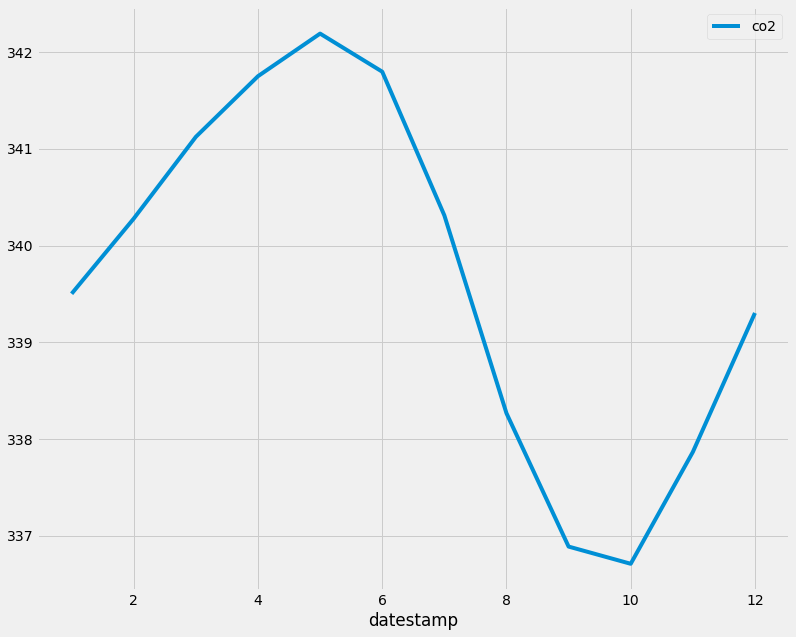

In [20]:
# Plotting aggregate values of your time series
index_month = co2_levels.index.month
co2_levels_by_month = co2_levels.groupby(index_month).mean()
co2_levels_by_month.plot(figsize=(12,10))
plt.show()

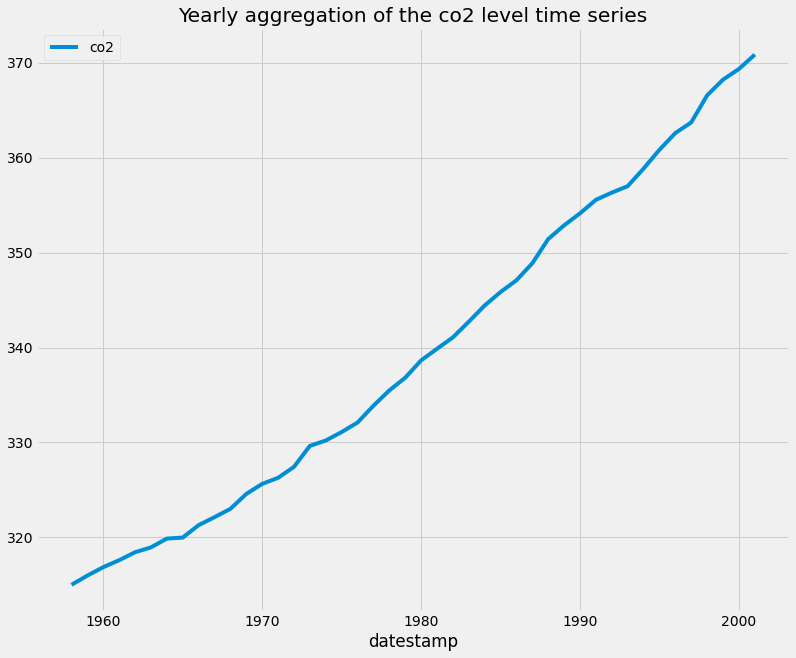

In [21]:
# Plotting aggregate values of your time series
index_year = co2_levels.index.year
co2_levels_by_year = co2_levels.groupby(index_year).mean()
co2_levels_by_year.plot(figsize=(12,10))
plt.title('Yearly aggregation of the co2 level time series')
plt.show()

Text(0.5, 1.0, 'Boxplot for the co2 levels data')

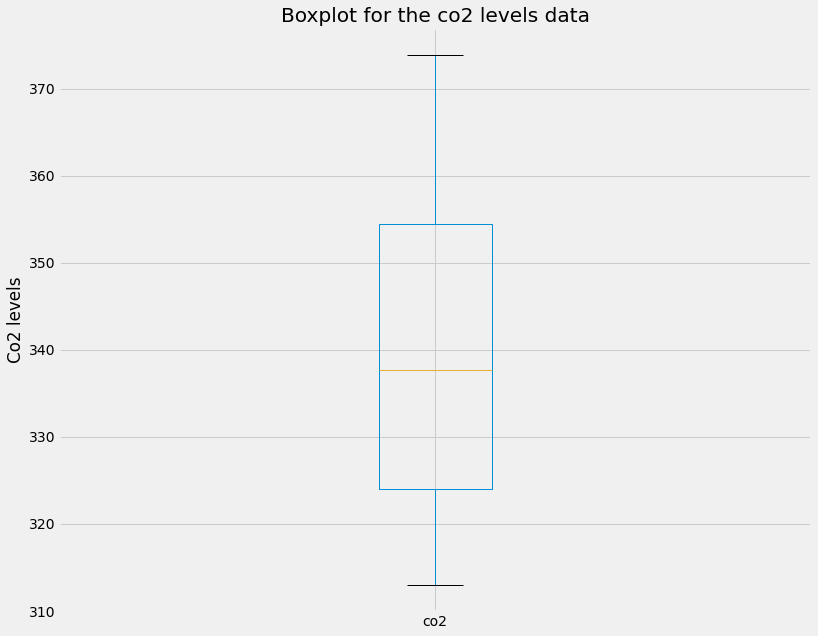

In [22]:
# Summarizing your data with boxplots
ax1 = co2_levels.boxplot(figsize=(12,10))
ax1.set_ylabel('Co2 levels')
ax1.set_title('Boxplot for the co2 levels data')

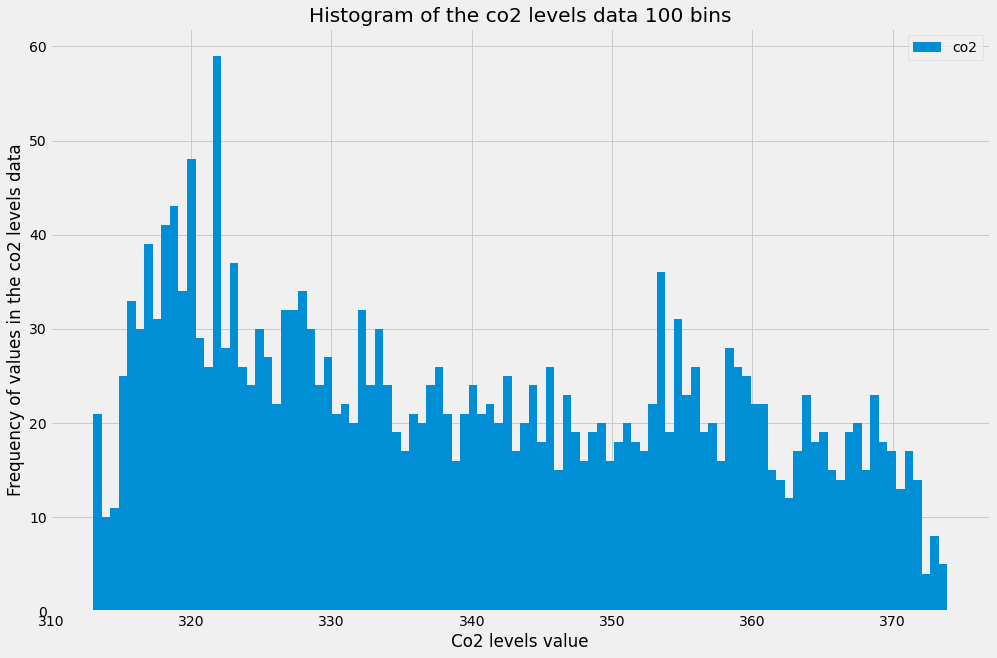

In [23]:
# Summarizing your data with histograms
ax2 = co2_levels.plot(kind='hist', bins=100, figsize=(15,10))
ax2.set_xlabel('Co2 levels value')
ax2.set_ylabel('Frequency of values in the co2 levels data')
ax2.set_title('Histogram of the co2 levels data 100 bins')
plt.show()

Text(0.5, 1.0, 'Density plot of the co2 levels data')

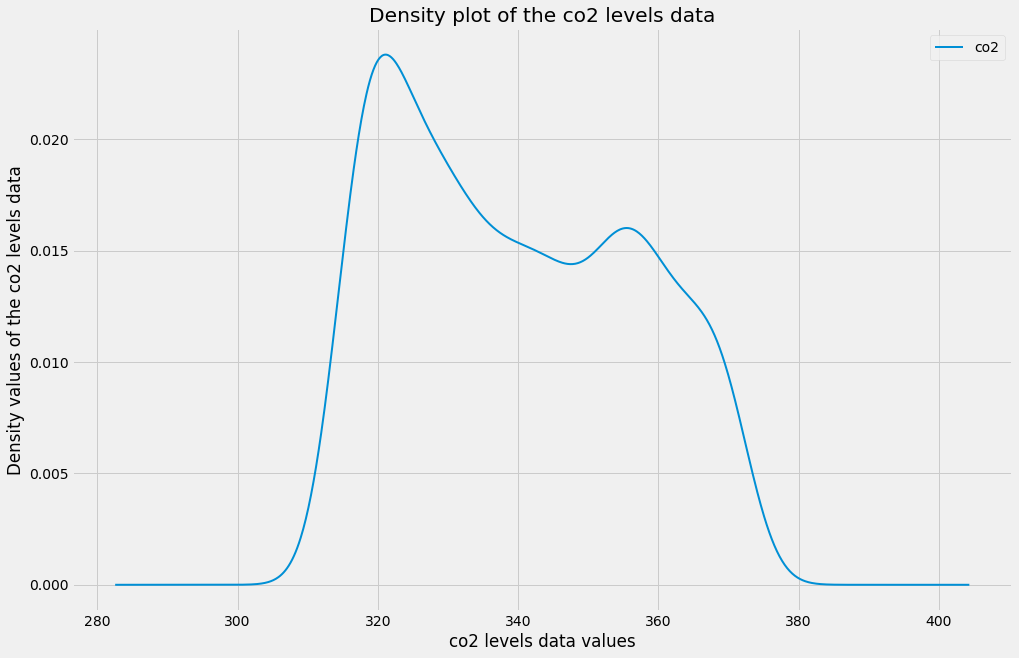

In [24]:
# Summarizing your data with density plots
ax3 = co2_levels.plot(kind='density', linewidth=2, figsize=(15,10))
ax3.set_xlabel('co2 levels data values')
ax3.set_ylabel('Density values of the co2 levels data')
ax3.set_title('Density plot of the co2 levels data')

# 3. Seasonality, Trend, and Noise


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


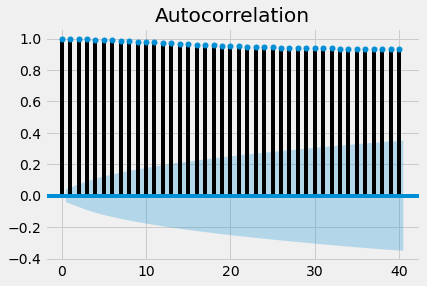

In [25]:
# Plotting autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(co2_levels['co2'], lags=40)
plt.show()

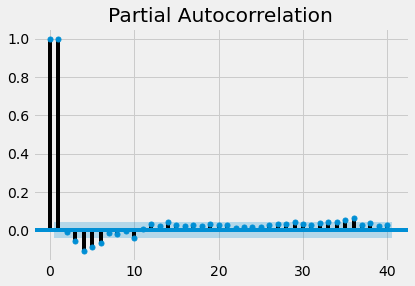

In [26]:
# Plotting partial autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=40)
plt.show()

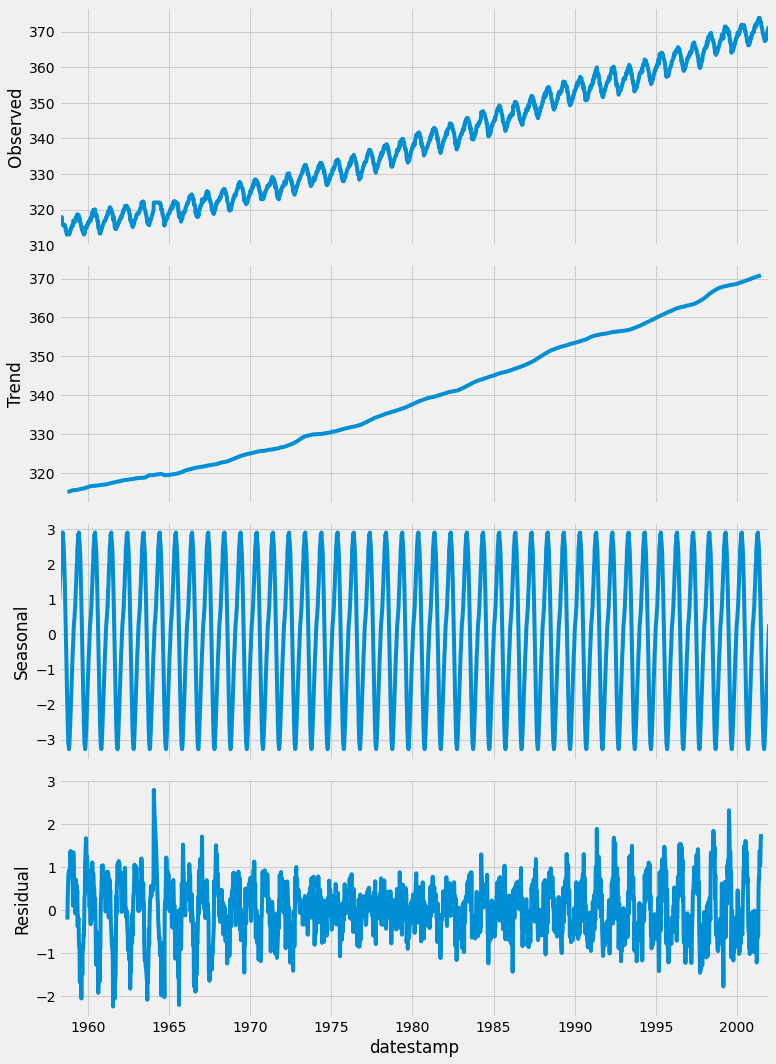

In [30]:
from pylab import rcParams
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

#Time series decomposition 
rcParams['figure.figsize'] = 11, 15  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(co2_levels['co2'])
fig = decomposition.plot()
plt.show()

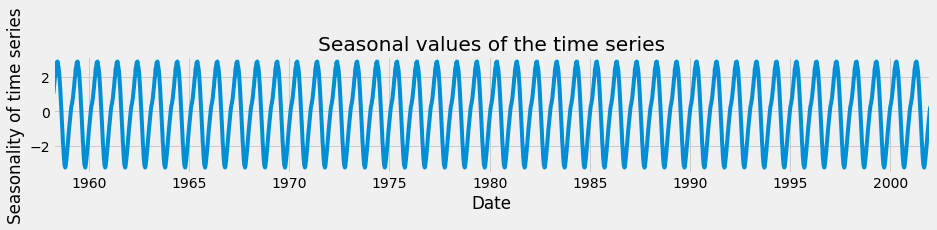

In [31]:
# Seasonality component in time series

decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()

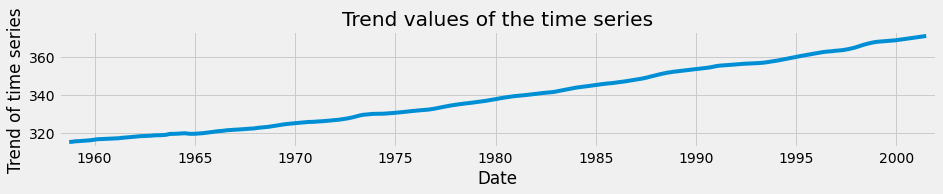

In [32]:
# Trend component in time series
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

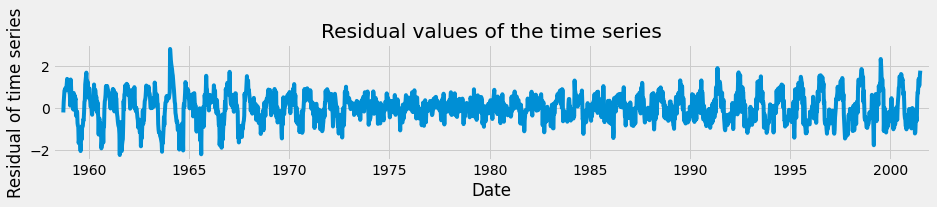

In [33]:
#Noise component in time series
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

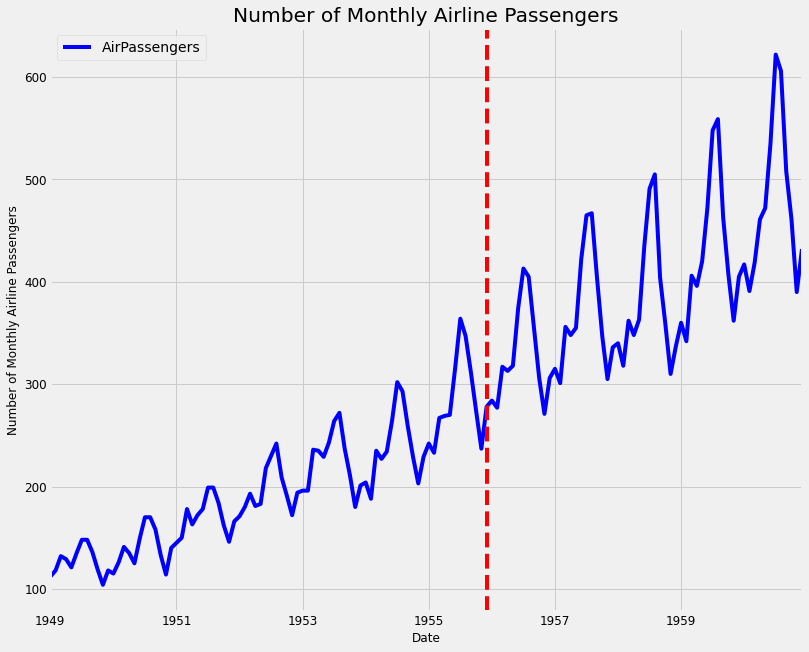

In [35]:
# upload the airline data
airline = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/airline_passengers.csv', parse_dates=['Month'], index_col='Month')

# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12, figsize=(12,10))

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Monthly Airline Passengers', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers')
plt.show()

In [36]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


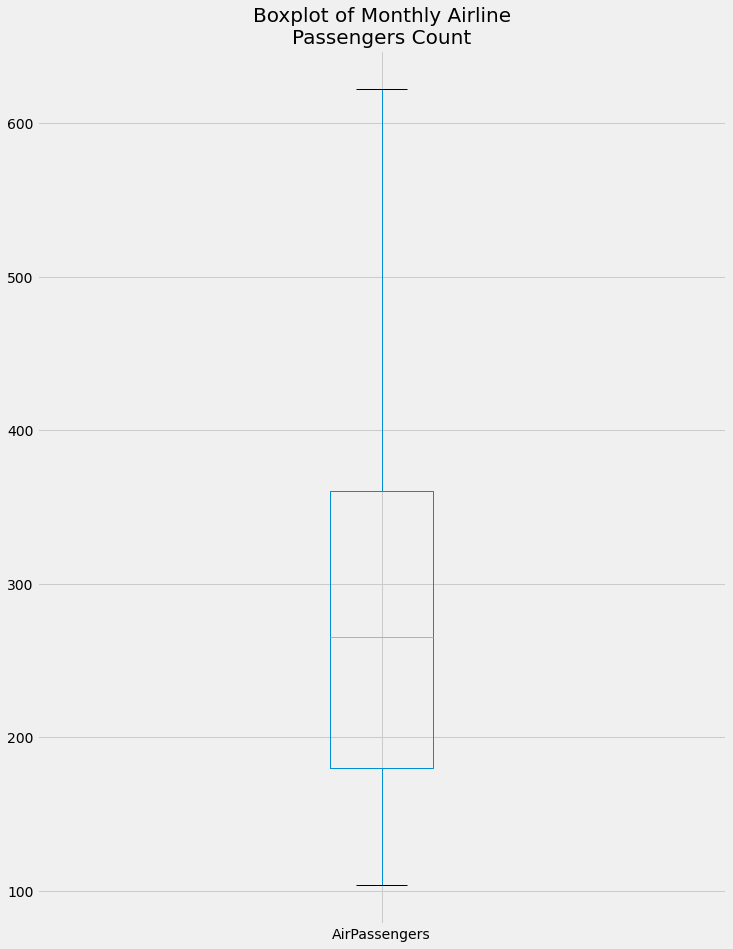

In [37]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

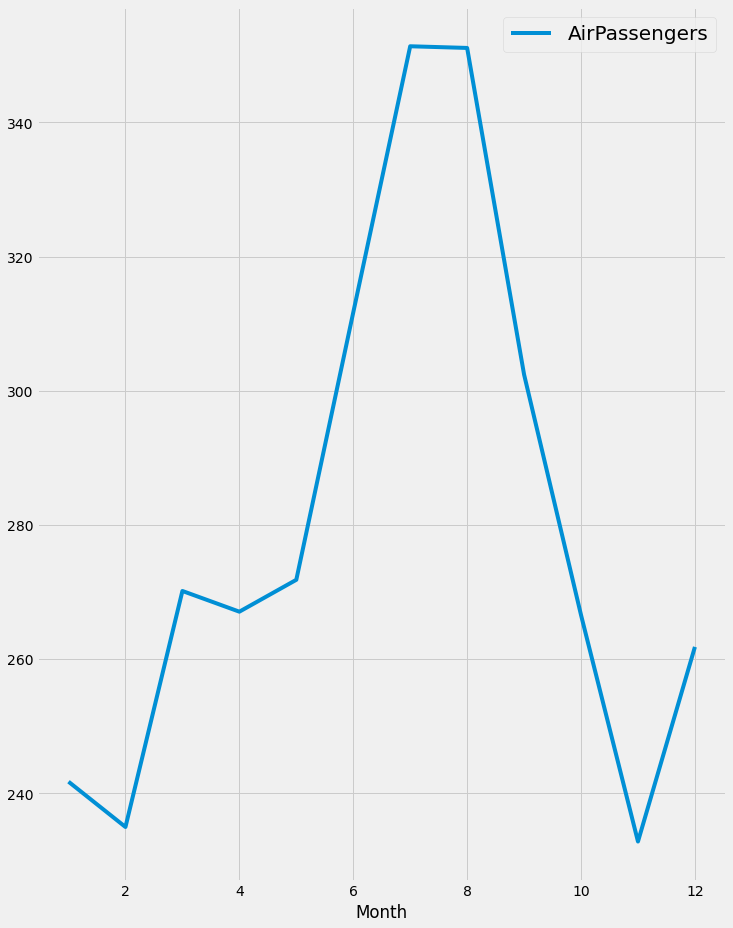

In [38]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

In [41]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposed = pd.DataFrame({'Trend':trend, 'Seasonal':seasonal})

# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head(5))

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [42]:
meat = pd.read_csv("https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/meat.csv", parse_dates=['date'], index_col='date')
print(meat.head(5))

             beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
date                                                                         
1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

            turkey  
date                
1944-01-01     NaN  
1944-02-01     NaN  
1944-03-01     NaN  
1944-04-01     NaN  
1944-05-01     NaN  


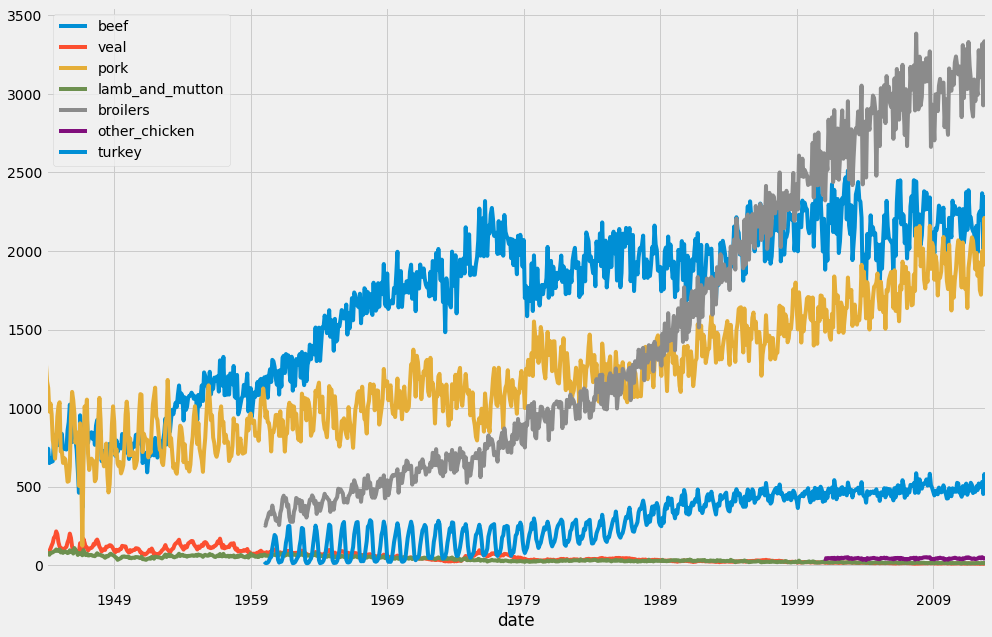

In [43]:
# plotting multiple time series
ax = meat.plot(figsize=(15, 10), fontsize=14)
plt.show()

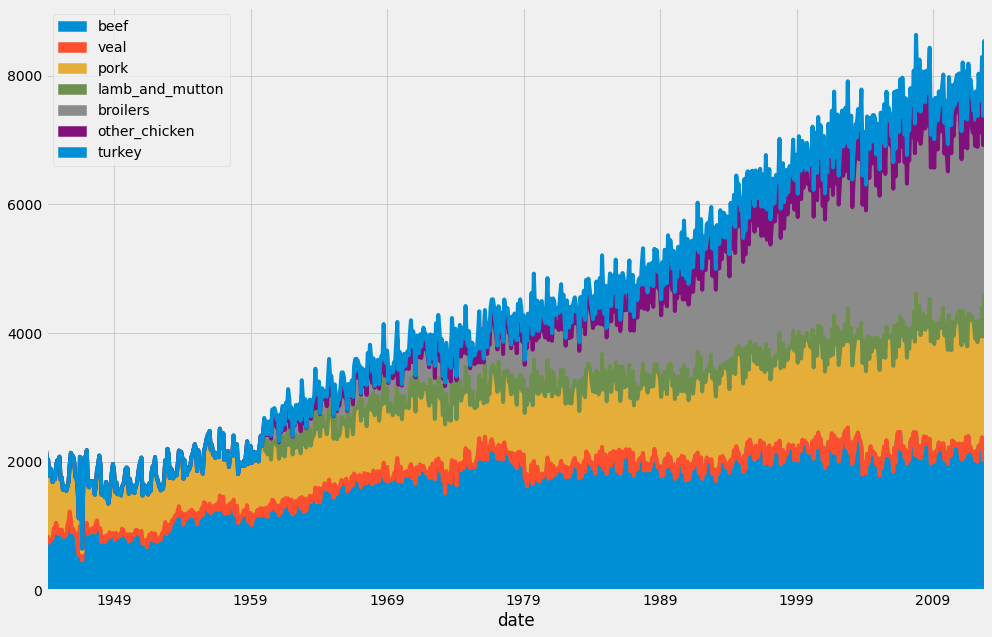

In [44]:
# Area charts
ax = meat.plot.area(figsize=(15, 10), fontsize=14)

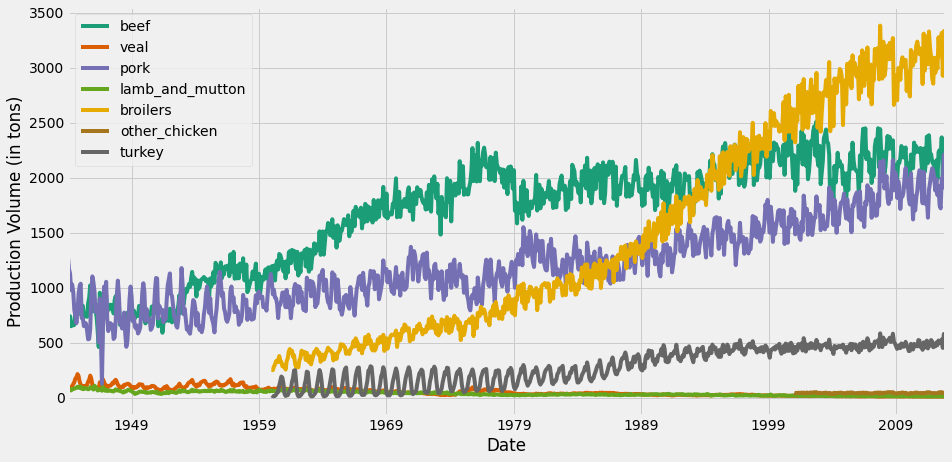

In [45]:
ax = meat.plot(colormap='Dark2', figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Production Volume (in tons)')
plt.show()

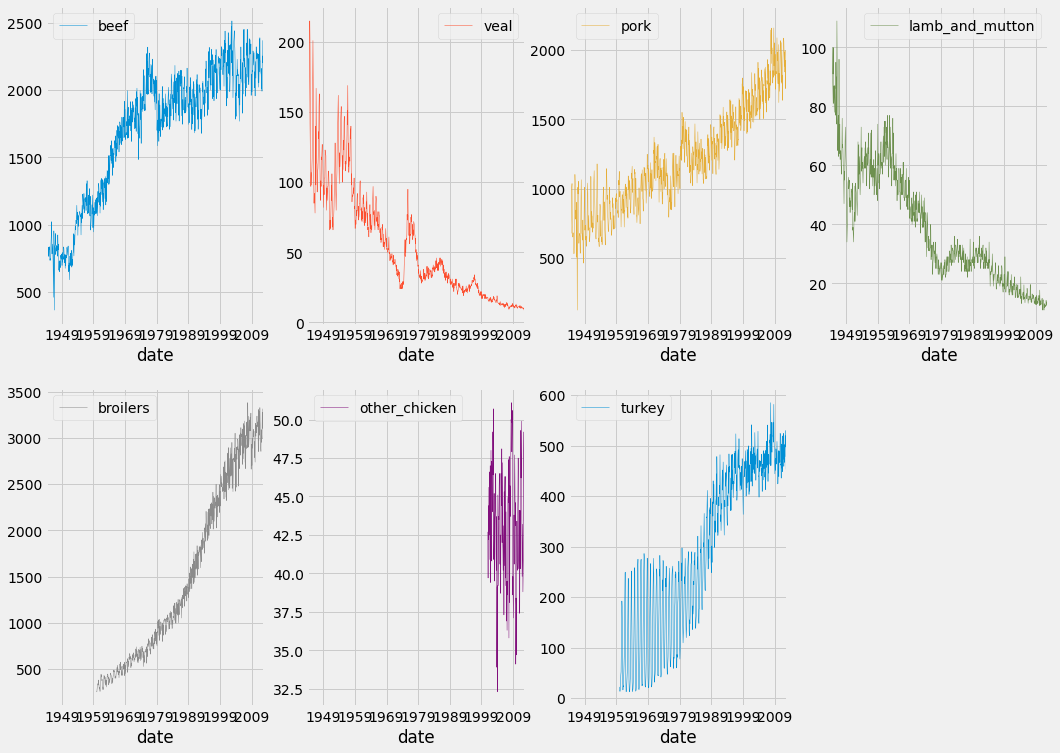

In [46]:
# Facet plots
meat.plot(subplots=True,
        linewidth=0.5,
        layout=(2, 4),
        figsize=(16, 12),
        sharex=False,
        sharey=False)
plt.show()

In [47]:
# Computing Correlation Matrices
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = meat[['beef', 'veal','turkey']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)

corr_s = meat[['beef', 'veal','turkey']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

Pearson correlation matrix
            beef      veal    turkey
beef    1.000000 -0.829704  0.738070
veal   -0.829704  1.000000 -0.768366
turkey  0.738070 -0.768366  1.000000
Spearman correlation matrix
            beef      veal    turkey
beef    1.000000 -0.812437  0.778533
veal   -0.812437  1.000000 -0.829492
turkey  0.778533 -0.829492  1.000000


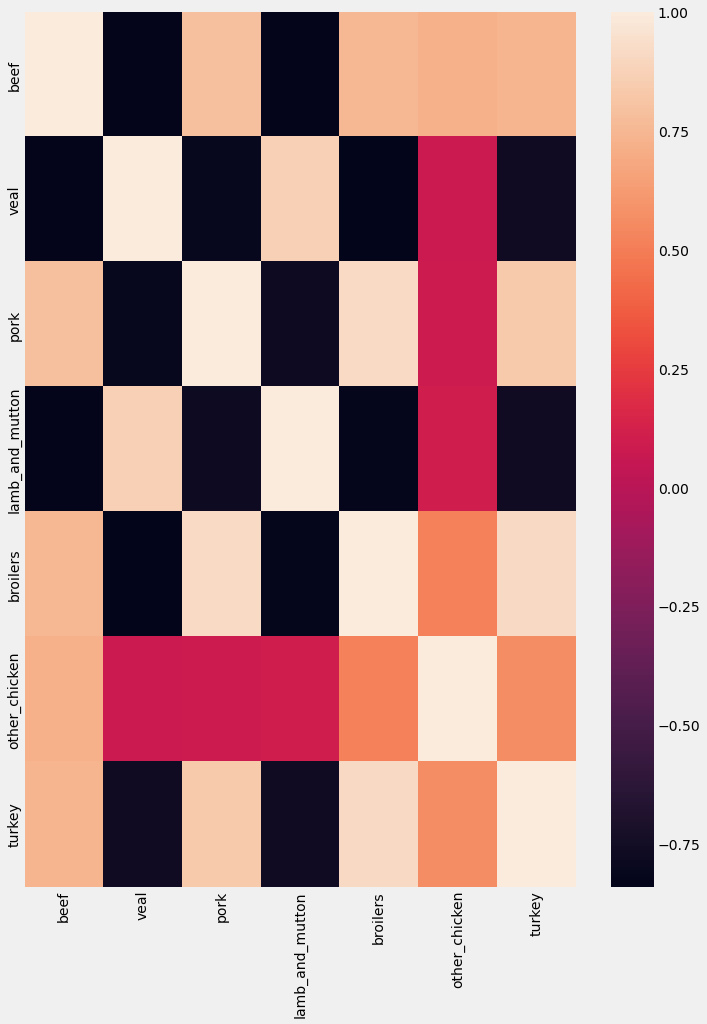

In [48]:
import seaborn as sns
corr_mat = meat.corr(method='pearson')
sns.heatmap(corr_mat)

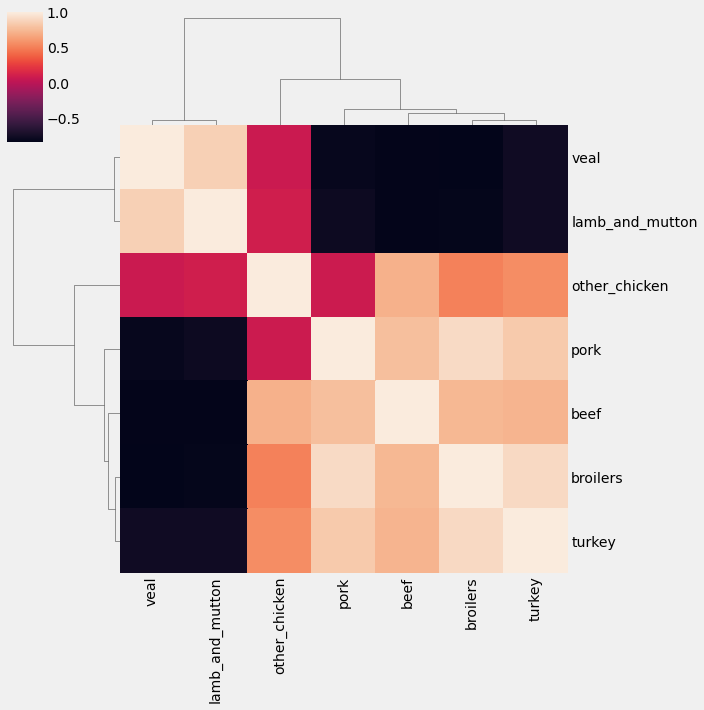

In [49]:
# Clustermap
sns.clustermap(corr_mat)

In [50]:
# Read in jobs file
jobs = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/employment.csv')

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

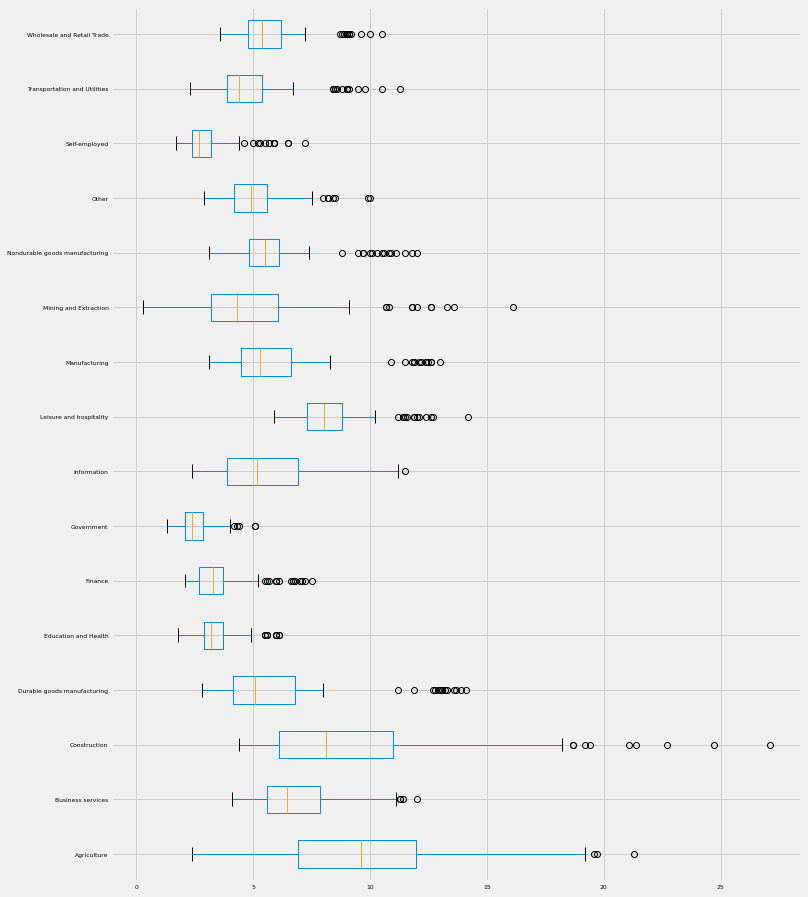

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [51]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

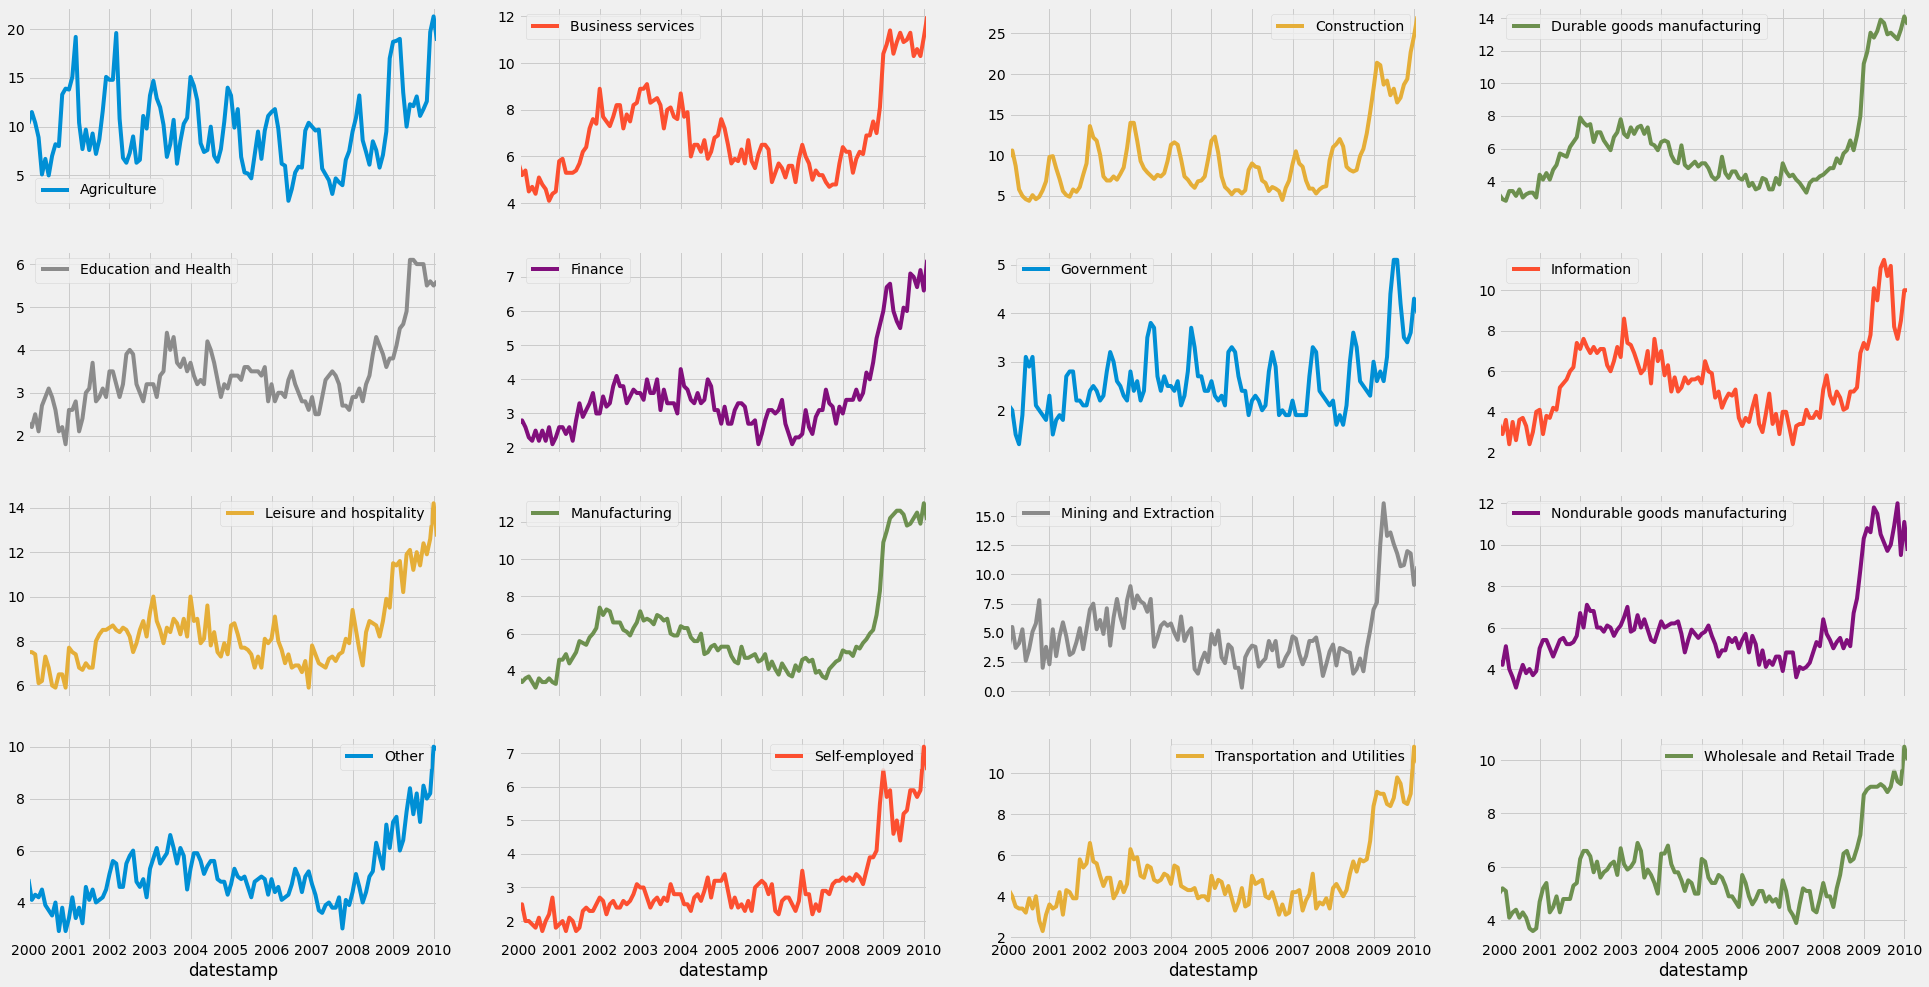

In [52]:
# Facet plots of the jobs dataset
jobs.plot(subplots=True, layout=(4, 4),
          figsize=(30, 16),
          sharex=True,
          sharey=False)
plt.show()

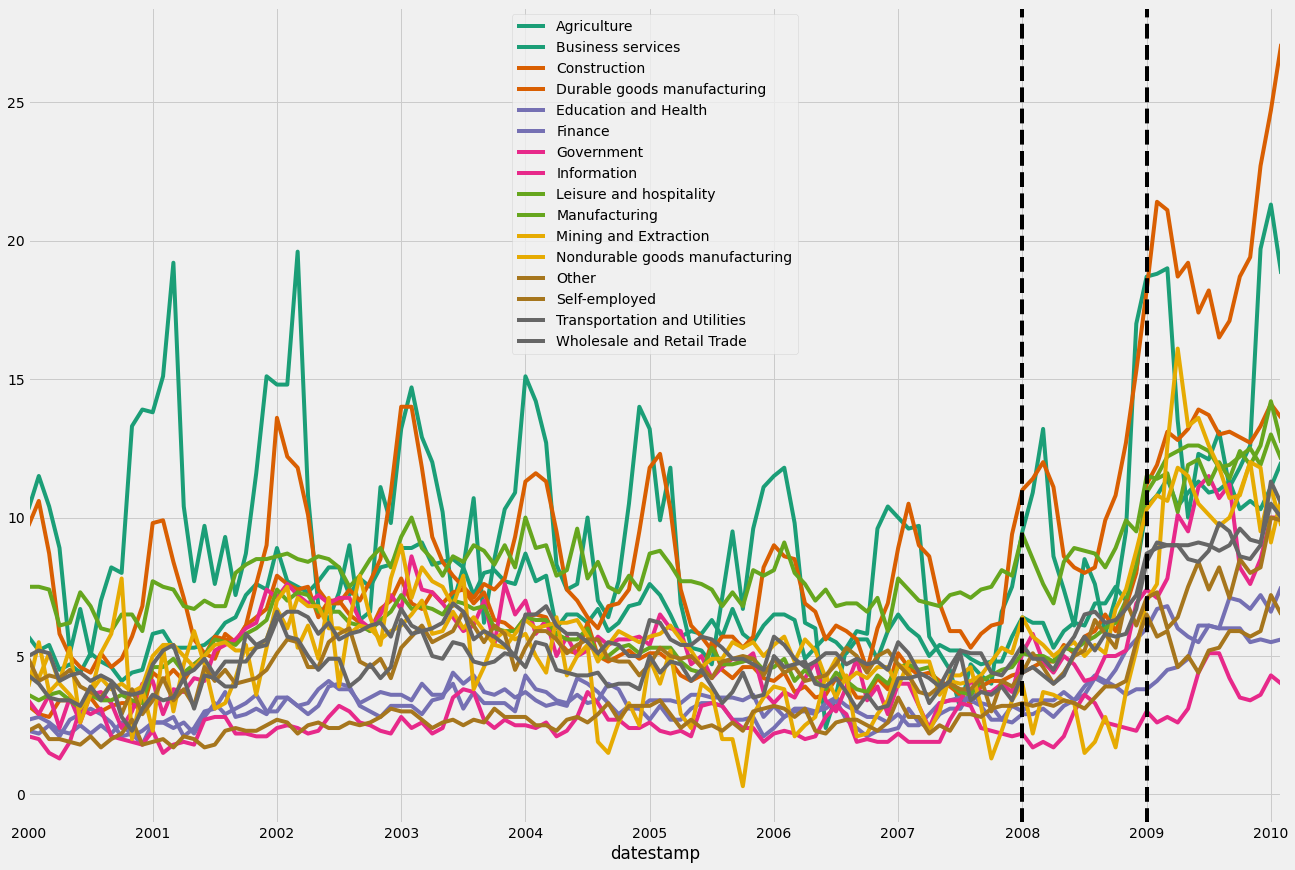

In [53]:
# Annotating events in the jobs dataset
ax = jobs.plot(figsize=(20, 14), colormap='Dark2')
ax.axvline('2008-01-01', color='black', linestyle='--')
ax.axvline('2009-01-01', color='black', linestyle='--')

           Agriculture  Business services  Construction  \
datestamp                                                 
1            13.763636           7.863636     12.909091   
2            13.645455           7.645455     13.600000   
3            13.830000           7.130000     11.290000   
4             9.130000           6.270000      9.450000   
5             7.100000           6.600000      8.120000   
6             6.770000           6.720000      7.430000   
7             7.010000           6.740000      7.350000   
8             8.080000           6.570000      7.300000   
9             7.090000           6.790000      7.560000   
10            7.490000           6.710000      7.840000   
11           10.470000           6.750000      8.700000   
12           12.940000           7.080000     10.800000   

           Durable goods manufacturing  Education and Health   Finance  \
datestamp                                                                
1                        

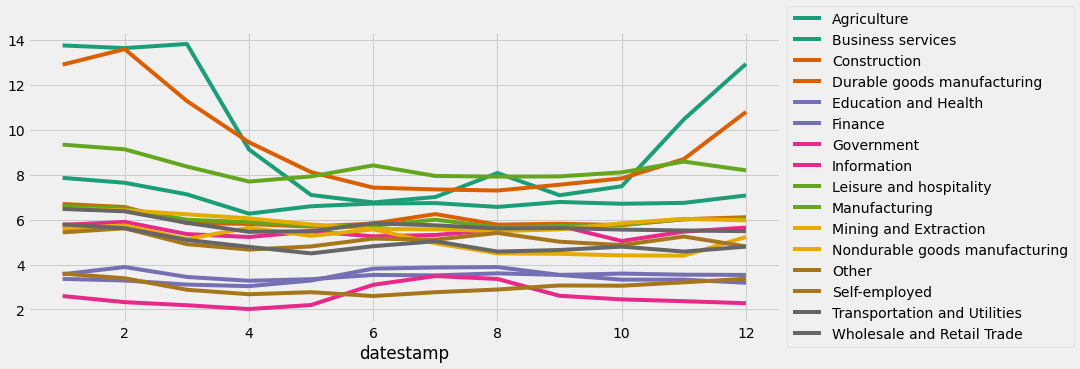

In [54]:
#Monthly averages in the jobs dataset
index_month = jobs.index.month
jobs_by_month = jobs.groupby(index_month).mean()
print(jobs_by_month)
ax = jobs_by_month.plot(figsize=(12, 5), colormap='Dark2')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')

In [55]:
# Decomposing multiple time series with Python dictionaries
# Import the statsmodel library
import statsmodels.api as sm
# Initialize a dictionary
my_dict = {}
# Extract the names of the time series
ts_names = jobs.columns
print(ts_names)

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')


In [56]:
# Run time series decomposition
for ts in ts_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    my_dict[ts] = ts_decomposition
    
# Initialize a new dictionnary for each component
my_dict_trend = {}
my_dict_seasonal = {}
my_dict_resid = {}
# Extract the trend component
for ts in ts_names:
    my_dict_trend[ts] = my_dict[ts].trend
    my_dict_seasonal[ts] = my_dict[ts].seasonal
    my_dict_resid[ts] = my_dict[ts].resid

# Convert to a DataFrame
trend_df = pd.DataFrame.from_dict(my_dict_trend)
seasonal_df = pd.DataFrame.from_dict(my_dict_seasonal)
resid_df = pd.DataFrame.from_dict(my_dict_resid)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

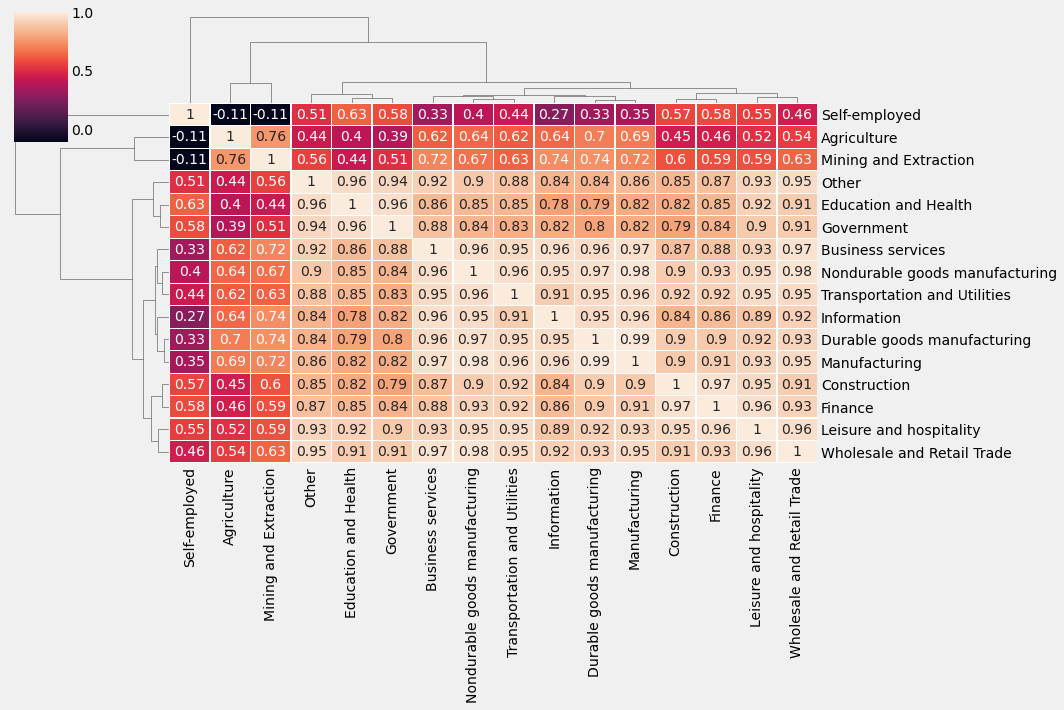

In [57]:
# Plotting a clustermap of the jobs correlation matrix

# Get correlation matrix of the seasonality_df DataFrame
trend_corr = trend_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr
fig = sns.clustermap(trend_corr, annot=True, linewidth=0.4,figsize=(15,10))

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)